**FINAL PROJECT**

Carrying out EDA on the Kyphosis disease dataset, Kyphosis is a disease of abnormally excessive convex spinal curvature.

The dataset consists of 81 rows and 4 columns of data on children who underwent corrective spine surgery.

- INPUT: 

1 "Age" in months, 

2 "Number" the number of vertebrae involved, 

3 "Start" the number of the first or uppermost vertebra operated on

- OUTPUT: 

"Kyphosis" with two unique values namely 'absent' and 'present' which indicate whether there is Kyphosis after surgery

In [209]:
#import file
import pandas as pd                # Data Manipulation and exploring
import numpy as np                 # Data Statistical Analysis 
import matplotlib.pyplot as plt    # Data Visualization 
import seaborn as sns              # Statistical Data Visualization
pd.options.display.max_columns = None
pd.options.display.max_rows = None

kyphosis_df = pd.read_csv('E:\_Portofolio\PortofolioProject\Kyphosis\kyphosis.csv')

In [210]:
#Explanatory Data Analysis
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [211]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [212]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [213]:
kyphosis_df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

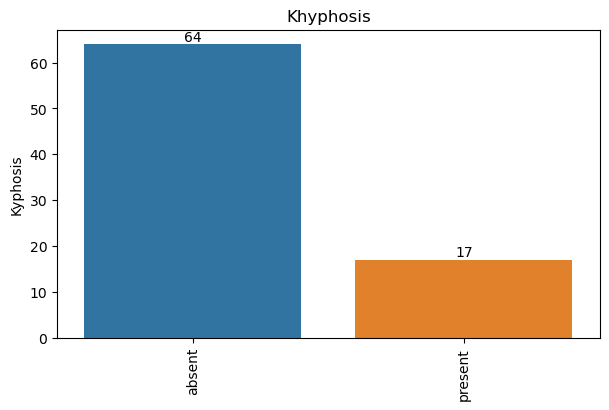

In [214]:
# Count Patients - 64 absent with no kyphosis after operation and 18 present with the disease after surgery 
plt.figure(figsize=(7, 4))
plt.title('Khyphosis')
plt.xticks(rotation=90)

y = kyphosis_df['Kyphosis'].value_counts()
plt.xticks(rotation=90)
ax = sns.barplot(x=list(y.index), y=y)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

In [215]:
#calculate the average, minimum, and maximum age in years with two methods #a) calculate the average age by changing the Age data in years first
def age_in_year(month): #function to change age from months to years
  return month/12

kyphosis_df['Age'] = kyphosis_df['Age'].apply(age_in_year) #apply the function to the Age column data
kyphosis_df.head() #age is in years

,Kyphosis,Age,Number,Start
0,absent,5.916667,3,5
1,absent,13.166667,3,14
2,present,10.666667,4,5
3,absent,0.166667,5,1
4,absent,0.083333,4,15


In [216]:
#b) calculate average age
kyphosis_df['Age'].mean()

6.971193415637861

In [217]:
#b) calculate minimum age
kyphosis_df[kyphosis_df['Age'] == kyphosis_df['Age'].min()]

,Kyphosis,Age,Number,Start
4,absent,0.083333,4,15
5,absent,0.083333,2,16
13,absent,0.083333,4,12
15,absent,0.083333,3,16
36,absent,0.083333,3,9


In [218]:
#c) calculate maximum age
kyphosis_df[kyphosis_df['Age'] == kyphosis_df['Age'].max()]

,Kyphosis,Age,Number,Start
73,absent,17.166667,4,10


In [219]:
# Perform data preprocessing. Import class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate an object out of our class 
LabelEncoder_y = LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,5.916667,3,5
1,0,13.166667,3,14
2,1,10.666667,4,5
3,0,0.166667,5,1
4,0,0.083333,4,15


In [220]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,5.916667,3,5
1,0,13.166667,3,14
3,0,0.166667,5,1
4,0,0.083333,4,15
5,0,0.083333,2,16


In [221]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [222]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,10.666667,4,5
9,1,4.916667,6,12
10,1,6.833333,5,14
21,1,8.750000,6,5
22,1,8.000000,3,12


In [223]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


<Axes: >

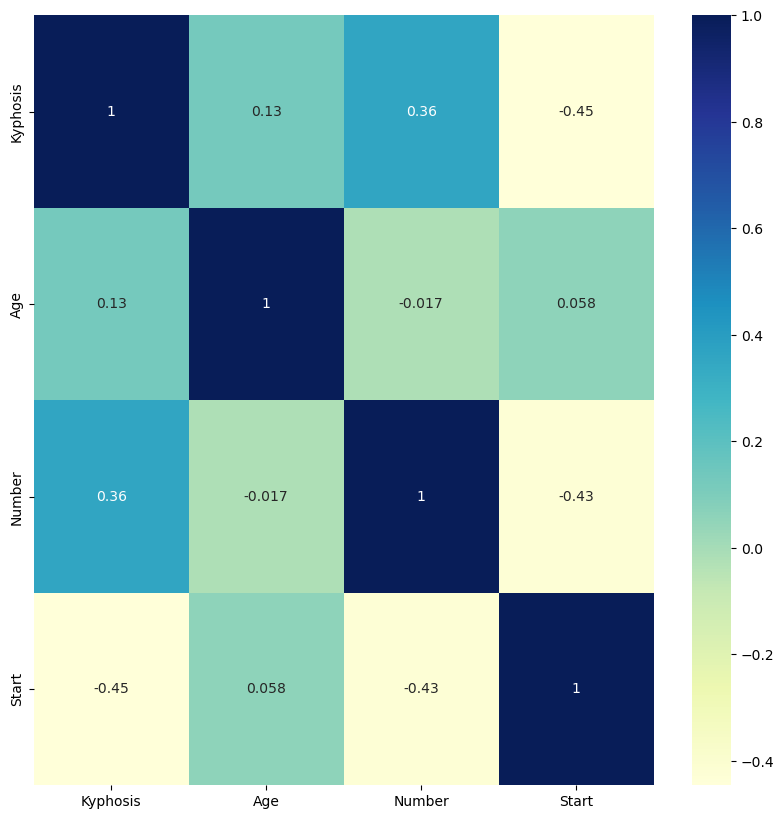

In [224]:
#plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlations = kyphosis_df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot = True, cmap = "YlGnBu")

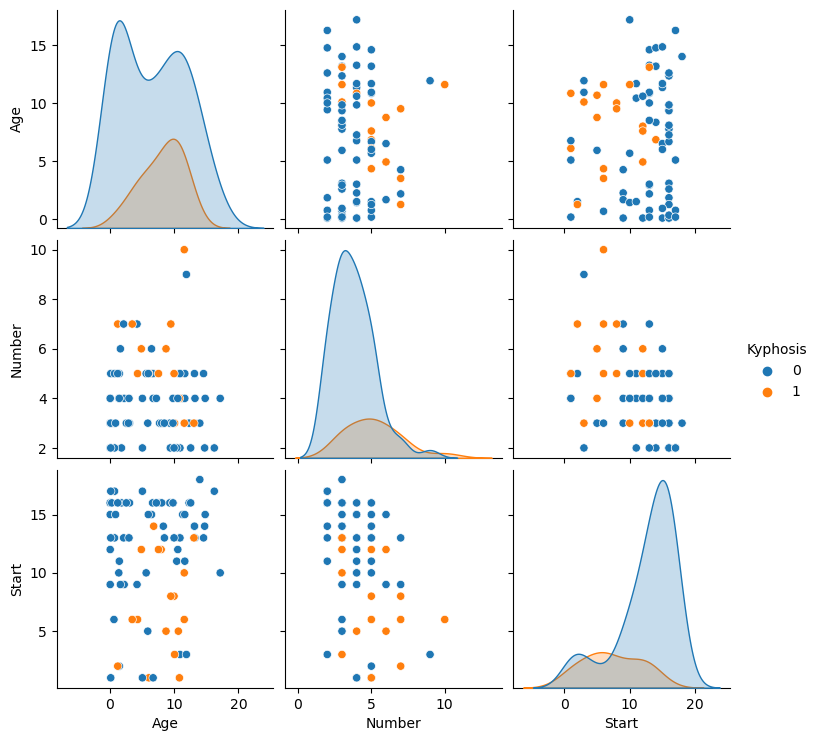

In [225]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])
plt.show()

In [226]:
#see data types
kyphosis_df.dtypes

Kyphosis      int32
Age         float64
Number        int64
Start         int64
dtype: object

In [227]:
#know the characteristics of the oldest and youngest in the data
kyphosis_df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,6.971193,4.049383,11.493827
std,0.409758,4.842021,1.619423,4.883962
min,0.000000,0.083333,2.000000,1.000000
25%,0.000000,2.166667,3.000000,9.000000
50%,0.000000,7.250000,4.000000,13.000000
75%,0.000000,10.833333,5.000000,16.000000
max,1.000000,17.166667,10.000000,18.000000


**By looking at the summary data in the "Age" column, you can see that the oldest age is 17 years, while the youngest age is 0.08 years**

In [228]:
#scaling the "Age" column in months using normalization (change the value ranges from 0 to 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kyphosis_df['Age'] = scaler.fit_transform(kyphosis_df['Age'].values.reshape(-1,1))
kyphosis_df['Age'].head()

0    0.341463
1    0.765854
2    0.619512
3    0.004878
4    0.000000
Name: Age, dtype: float64

In [229]:
#sanity check
kyphosis_df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,0.403192,4.049383,11.493827
std,0.409758,0.283435,1.619423,4.883962
min,0.000000,0.000000,2.000000,1.000000
25%,0.000000,0.121951,3.000000,9.000000
50%,0.000000,0.419512,4.000000,13.000000
75%,0.000000,0.629268,5.000000,16.000000
max,1.000000,1.000000,10.000000,18.000000


In [230]:
#normalize the scale using standardization (change the average value to 0, and std 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kyphosis_df['Age'] = scaler.fit_transform(kyphosis_df['Age'].values.reshape(-1,1))
kyphosis_df['Age'].head()

0   -0.219143
1    1.287494
2    0.767964
3   -1.414063
4   -1.431381
Name: Age, dtype: float64

In [231]:
#sanity check
kyphosis_df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,8.100000e+01,81.000000,81.000000
mean,0.209877,-1.329526e-16,4.049383,11.493827
std,0.409758,1.006231e+00,1.619423,4.883962
min,0.000000,-1.431381e+00,2.000000,1.000000
25%,0.000000,-9.984388e-01,3.000000,9.000000
50%,0.000000,5.793938e-02,4.000000,13.000000
75%,0.000000,8.025994e-01,5.000000,16.000000
max,1.000000,2.118743e+00,10.000000,18.000000


It can be seen that in the Age column the mean value changes from 83.654321 to 1.000571e-16 or 0.0000000000000001
and the std value changes from 58.104251 to 1.006231e+00 or 1

In [232]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,-0.219143,3,5
1,0,1.287494,3,14
2,1,0.767964,4,5
3,0,-1.414063,5,1
4,0,-1.431381,4,15


In [233]:
kyphosis_df['Age'].describe()

count    8.100000e+01
mean    -1.329526e-16
std      1.006231e+00
min     -1.431381e+00
25%     -9.984388e-01
50%      5.793938e-02
75%      8.025994e-01
max      2.118743e+00
Name: Age, dtype: float64

In [234]:
#Testing and Training dataset
# Drop the target label (Kyphosis column)
X = kyphosis_df.drop(['Kyphosis'], axis = 1)
X.head()

,Age,Number,Start
0,-0.219143,3,5
1,1.287494,3,14
2,0.767964,4,5
3,-1.414063,5,1
4,-1.431381,4,15


In [235]:
# Output target class
y = kyphosis_df['Kyphosis']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: int32

In [236]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape

(56, 3)

In [237]:
y_train.shape

(56,)

In [238]:
X_test.shape

(25, 3)

In [239]:
y_test.shape

(25,)

In [240]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [241]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = decision_tree.predict(X_test)
y_predict_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [242]:
y_test

37    1
11    0
73    0
12    0
80    0
19    0
56    0
4     0
26    0
64    0
75    0
49    0
43    0
46    0
20    0
76    1
78    0
10    1
2     1
55    0
70    0
40    1
16    0
52    1
48    1
Name: Kyphosis, dtype: int32

In [243]:
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

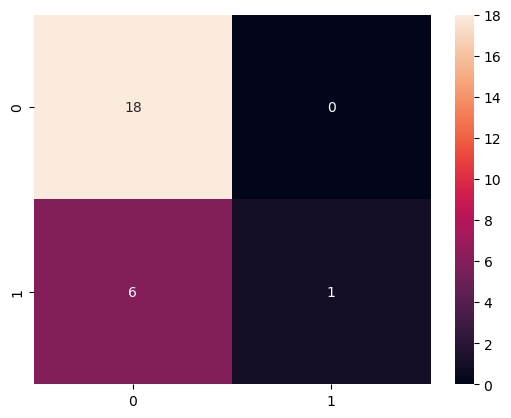

In [244]:
# Misclassified 3 and 4 samples. Correctly classified 18 samples (16 class 0 and 2 class 1)
sns.heatmap(cm, annot = True)

In [245]:
TN, FP, FN, TP = confusion_matrix(y_test, y_predict_test).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1
False Positive(FP) =  0
True Negative(TN)  =  18
False Negative(FN) =  6


In [246]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.760


In [247]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25



In [248]:
#Training model2
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [249]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

<Axes: >

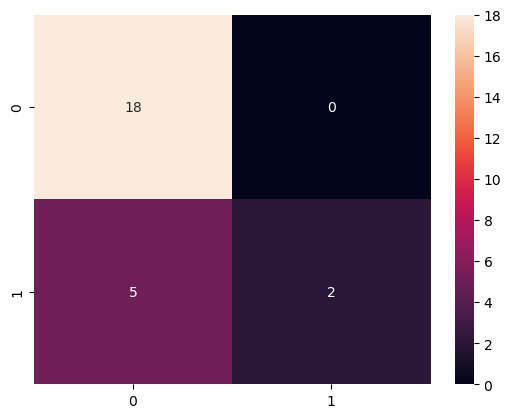

In [250]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [251]:
TN, FP, FN, TP = confusion_matrix(y_test, y_predict_test).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2
False Positive(FP) =  0
True Negative(TN)  =  18
False Negative(FN) =  5


In [252]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.800


In [253]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.29      0.44         7

    accuracy                           0.80        25
   macro avg       0.89      0.64      0.66        25
weighted avg       0.84      0.80      0.76        25

